**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab14](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab14/Lab14.ipynb)

___

# <font color=darkgreen>Laboratory 14: Data Models and Graphing </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Laboratory 14 - In-Lab


In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


## Example 1

Consider the data below

|Methanol Mole Fraction (Liquid Phase)| Methanol Mole Fraction (Vapor Phase) |
|---|---|
|1.0| 1.0 |
|0.882| 0.929 |
|0.765| 0.849 |
|0.653| 0.764 |
|0.545| 0.673 |
|0.443| 0.575 |
|0.344| 0.471 |
|0.25 | 0.359 |
|0.159| 0.241 |
|0.072| 0.114 |
|0.0  | 0.0   |
 
Estimate the vapor mole fraction of methanol corresponding to the liquid mole fraction of methanol of x = 0.15.  

Let's  try a few different functional forms as a data model; first linear, then quadratic, and then a power-law model.

As a first step, lets import some minimal needed packages, and build a plotting function.

In [3]:
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

Next lets define some data models; linear, quadratic, and power-law

In [4]:
def linear(b0,b1,x):
    ''' 
    linear data model, b0,b1 are parameters
    return y = b0+b1*x
    '''
    linear=b0+b1*x
    return(linear)

def quadratic(b0,b1,b2,x):
    ''' 
    quadratic data model, b0,b1 are parameters
    return y = b0+b1*x+b2*x^2
    '''
    quadratic=b0+b1*x+b2*x**2
    return(quadratic)  

def powerlaw(b0,b1,b2,x):
    '''
    power law data model
    return y = b0 + b1*x**b2'''
    powerlaw=b0+b1*x**b2
    return(powerlaw)

def residue(list1,list2,list3):
    ''' 
    compute residues
    list3 = list1 - list2
    return residuals in list3
    '''
    if len(list1)!=len(list2) or len(list1)!=len(list3):
        print('Lists unequal length, undefined operations')
        return
    for i in range(len(list1)):
        list3[i]=list1[i]-list2[i]
    return(list3)

Now lets make some model fits (trial-and-error); First the needed data

In [5]:
xtable = [1.0,0.882,0.765,0.653,0.545,0.443,0.344,0.25,0.159,0.072,0]
ytable = [1.0 ,0.929 ,0.849 ,0.764 ,0.673 ,0.575 ,0.471 ,0.359 ,0.241 ,0.114 ,0]


Enter b0 value 0.05
Enter b1 value 1


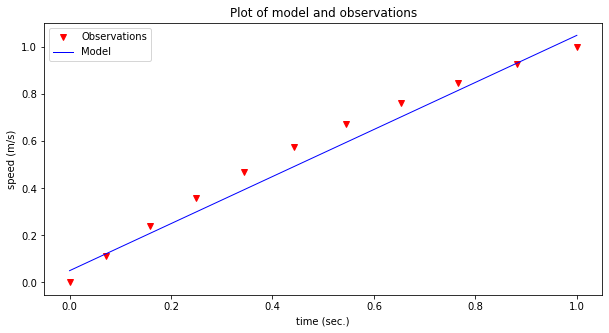

In [9]:
# Fit a data model - linear model
intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(linear(intercept,slope,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','speed (m/s)','Plot of model and observations')

In [10]:
# get the residues
resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
print(sum(resids))
for i in range(len(resids)):
    resids[i]=resids[i]**2
print(sum(resids))

0.3119999999999997
0.03319199999999998


Enter b0 value 0
Enter b1 value 1.75
Enter b2 value -.8


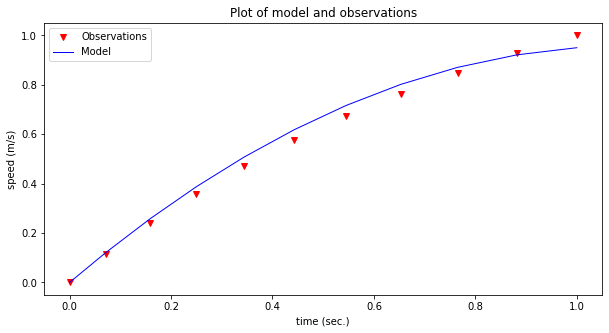

In [11]:
# Fit a data model - quadratic model
intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
curvature = float(input('Enter b2 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(quadratic(intercept,slope,curvature,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','speed (m/s)','Plot of model and observations')

In [12]:
# get the residues
resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
print(sum(resids))
for i in range(len(resids)):
    resids[i]=resids[i]**2
print(sum(resids))

-0.17744359999999992
0.010656751633440004


Enter b0 value 0
Enter b1 value 1
Enter b2 value 0.75


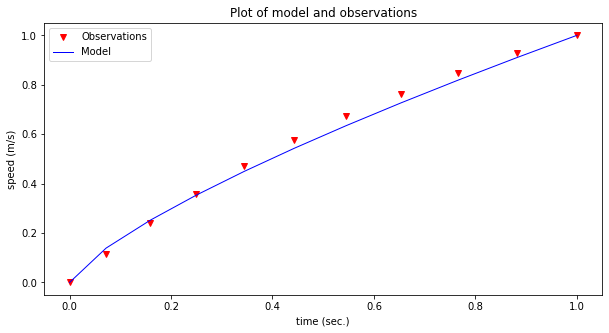

In [13]:
# Fit a data model - power-law model
intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
exponent=float(input('Enter b2 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(powerlaw(intercept,slope,exponent,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','speed (m/s)','Plot of model and observations')

In [14]:
# get the residues
resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
print(sum(resids))
for i in range(len(resids)):
    resids[i]=resids[i]**2
print(sum(resids))

0.14964279768159716
0.006498995544891791


Now choose which data model to use and make the estimate

In [15]:
xwant = float(input('Liquid Phase Mole Fraction'))
print('Estimated Vapor Phase Mole Fraction : ',round(quadratic(0.0,1.75,-.8,xwant),3))

Liquid Phase Mole Fraction .15


Estimated Vapor Phase Mole Fraction :  0.245


In [16]:
xwant = float(input('Liquid Phase Mole Fraction'))

print('Estimated Vapor Phase Mole Fraction : ',round(powerlaw(0.0,1.0,0.75,xwant),3))

Liquid Phase Mole Fraction .15


Estimated Vapor Phase Mole Fraction :  0.241


In [19]:
xwant = float(input('Liquid Phase Mole Fraction'))

print('Estimated Vapor Phase Mole Fraction : ',round(linear(0.05,1.0,xwant),3))

Liquid Phase Mole Fraction .15


Estimated Vapor Phase Mole Fraction :  0.2


xwant = float(input('Liquid Phase Mole Fraction'))

print('Estimated Vapor Phase Mole Fraction : ',round(residue(0.0,1.0,0.75,xwant),3))

### Exercise 1
A meaningful modification is to make the estimate using all the models (you will have to use care in parameter names, but its an easy model!).  It is left as an exercise.

<!--## Example 2

Same data as above, only this time use interpolating polynomials (as in the lesson).

|Methanol Mole Fraction (Liquid Phase)| Methanol Mole Fraction (Vapor Phase) |
|---|---|
|1.0| 1.0 |
|0.882| 0.929 |
|0.765| 0.849 |
|0.653| 0.764 |
|0.545| 0.673 |
|0.443| 0.575 |
|0.344| 0.471 |
|0.25 | 0.359 |
|0.159| 0.241 |
|0.072| 0.114 |
|0.0  | 0.0   |
 
Estimate (interpolate) the vapor mole fraction of methanol corresponding to the liquid mole fraction of methanol of x = 0.15.-->

<!--```
def lagint(xlist,ylist,xpred): # build an interpolator function
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)
```-->

<!--```
xtable = [1.0,0.882,0.765,0.653,0.545,0.443,0.344,0.25,0.159,0.072,0]
ytable = [1.0 ,0.929 ,0.849 ,0.764 ,0.673 ,0.575 ,0.471 ,0.359 ,0.241 ,0.114 ,0 ]

xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting

step_size = 0.1  # step size
how_many = int(1.0/step_size)

# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(xtable,ytable,float(i)*step_size))

    
    #print(lagint(xtable,ytable,xwant))
#print(round(lagint(xtable,ytable,xwant),3))
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (9,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(xtable, ytable ,color ='red') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='blue') # the polynomial
matplotlib.pyplot.xlabel("Mole Fraction - Liquid Phase") 
matplotlib.pyplot.ylabel("Mole Fraction - Vaopr Phase") 
mytitle = "Interpolating Polynomial Fit to Observations\n "
mytitle += "Red Markers are Observations " + "\n"
mytitle += "Blue Curve is Fitted Polynomial "+ "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

xwant = float(input('Liquid Phase Mole Fraction'))
print('Estimated Vapor Phase Mole Fraction : ',round(lagint(xtable,ytable,xwant),3))
```-->